# Concatenado de Financial Risk debido a la alta cantidad de artículos en el tema

In [1]:
import pandas as pd
import os

# Ruta de la carpeta donde están almacenados los archivos CSV de 'Financial Risk'
csv_folder_path = 'D:\\CodeProjects\\QuantFinanceResearch\\CSVs'

# Lista de archivos CSV de 'Financial Risk'
financial_risk_files = [
    'FinancialRisk2005_2010.csv',
    'FinancialRisk2011_2014.csv',
    'FinancialRisk2015_2017.csv',
    'FinancialRisk2018_2019.csv',
    'FinancialRisk2020_2021.csv',
    'FinancialRisk2022_2023.csv',
    'FinancialRisk2024_2025.csv' # Agrega los nombres de todos los archivos que tengas
]

# Lista para almacenar los DataFrames cargados
df_list = []

# Recorremos cada archivo y lo añadimos a la lista
for file_name in financial_risk_files:
    file_path = os.path.join(csv_folder_path, file_name)
    try:
        df = pd.read_csv(file_path)
        df_list.append(df)
    except FileNotFoundError:
        print(f'Archivo no encontrado: {file_path}')

# Combinamos todos los DataFrames en uno solo
combined_df = pd.concat(df_list, ignore_index=True)

# Guardamos el DataFrame combinado en un nuevo archivo CSV
output_path = os.path.join(csv_folder_path, 'Financial_Risk_Combined.csv')
combined_df.to_csv(output_path, index=False)

print(f'Archivos combinados guardados en: {output_path}')


Archivos combinados guardados en: D:\CodeProjects\QuantFinanceResearch\CSVs\Financial_Risk_Combined.csv


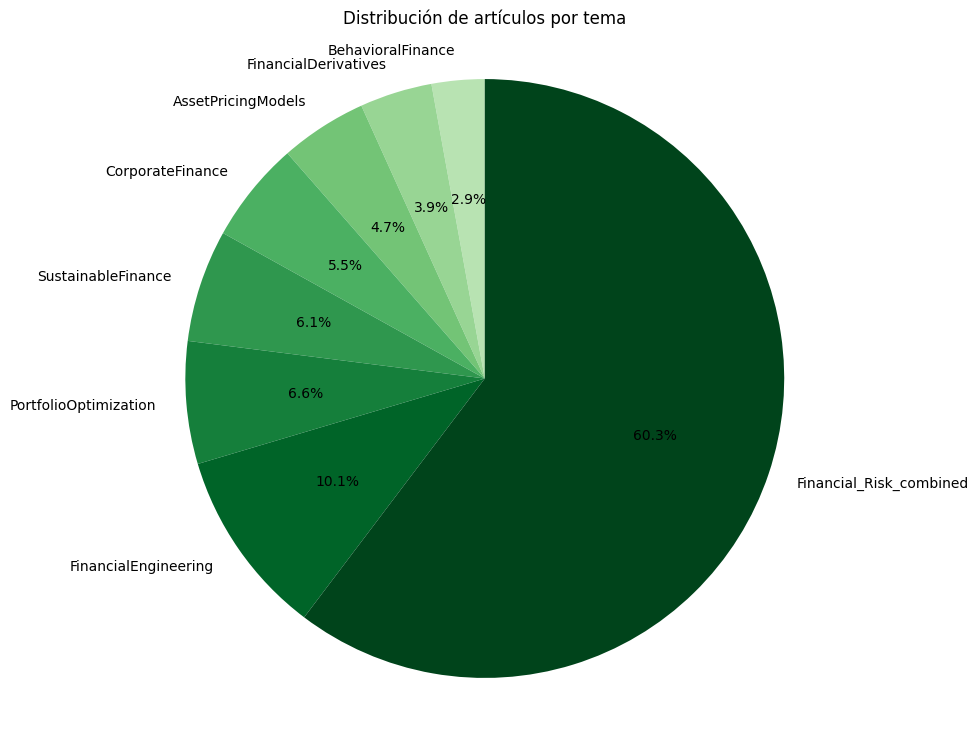

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Ruta donde están almacenados los archivos CSV
csv_folder_path = 'D:\\CodeProjects\\QuantFinanceResearch\\CSVs'

# Nombres de los temas correspondientes a los archivos CSV
topics = [
    'SustainableFinance', 'CorporateFinance',
    'FinancialEngineering', 'BehavioralFinance', 'PortfolioOptimization',
    'FinancialDerivatives', 'Financial_Risk_combined', 'AssetPricingModels'
]

# Inicializamos un diccionario para contar el número de artículos por tema
abstract_counts = {topic: 0 for topic in topics}

# Recorremos cada archivo CSV para contar el número de abstracts
for topic in topics:
    file_path = os.path.join(csv_folder_path, f'{topic}.csv')
    try:
        # Cargamos el archivo CSV correspondiente
        df = pd.read_csv(file_path)
        
        # Contamos el número de abstracts
        abstract_counts[topic] = len(df)
    except FileNotFoundError:
        print(f'Archivo no encontrado: {file_path}')

# Ordenamos los temas por cantidad de abstracts
sorted_abstract_counts = dict(sorted(abstract_counts.items(), key=lambda item: item[1]))

# Generamos colores desde el más claro al más oscuro basado en la cantidad de abstracts
num_colors = len(sorted_abstract_counts)
colors = plt.cm.Greens(np.linspace(0.3, 1, num_colors))  # Escala de tonos azules, puedes cambiar 'Blues' por otra

# Creamos el gráfico circular
labels = list(sorted_abstract_counts.keys())
sizes = list(sorted_abstract_counts.values())

plt.figure(figsize=(8.5, 9))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')  # Asegura que el gráfico sea circular
plt.title('Distribución de artículos por tema')
plt.show()
